<a href="https://colab.research.google.com/github/santonu18/-Project-Name-Fake-News-Detection-and-Evaluation-with-Confusion-Matrix-created-by-Suprava-Das-/blob/main/04_fake_news_detection_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name: Fake News Detection and Evaluation with Confusion Matrix**
####**created by: Suprava Das**

# **Problem Statement:**


This project addresses the challenge of distinguishing fake news from true news using machine learning techniques. A classification model is trained on textual data, and its effectiveness is evaluated through a confusion matrix to assess accuracy and misclassification patterns.

# **Data Introduction:**

This dataset was compiled from real-world sources; the genuine articles were scraped from Reuters.com (a reputable news website). In contrast, the fake news articles were gathered from various unreliable platforms identified by Politifact (a U.S.-based fact-checking organization) and Wikipedia. The collection covers articles on diverse subjects, though most of them center around politics and world news.

The dataset cab also be downloaded from kaggle using the link: www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets

# **Import Packages**

Imported all required libraries and installed any missing packages in Google Colab.

In [ ]:
# installed missing package gensim
!pip install gensim

In [ ]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Preprocessing**

In [ ]:
# read the csv file using pandas dataframe
fake_news_data = pd.read_csv('/content/drive/My Drive/IDEAS-TIH/Internship_2025/Fake.csv')
true_news_data = pd.read_csv('/content/drive/My Drive/IDEAS-TIH/Internship_2025/True.csv')

**Q1.** View the imported csv file data using Pandas Dataframe.

In [ ]:
# View the merged DataFrame
import pandas as pd  # Import pandas library

# Step 1: Load your CSV file
df = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/Fake.csv")  #fake news file path
df = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/True.csv")  #true news file path

# Step 2: View the entire DataFrame
print(df)

# Step 3 (Optional): View only the first few rows
print(df.head())  # Displays first 5 rows

# Step 4 (Optional): View basic info about the DataFrame
print(df.info())  # Shows column names, data types, and non-null counts

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv... 

In [ ]:
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

In [ ]:
# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

**Q2.** drop rows from the dataset consisting null values.

In [ ]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/Fake.csv")  #fake news file path
df = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/True.csv")  #true news file path

# Drop rows with any null values
df_cleaned = df.dropna()

# View the cleaned DataFrame
print(df_cleaned)

# (Optional) Check if there are still any null values left
print(df_cleaned.isnull().sum())

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv... 

**Q3.** shuffle the data.

In [ ]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/Fake.csv")  #fake news file path
df = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/True.csv")  #true news file path

# Shuffle the data
df_shuffled = df.sample(frac=1, random_state=42)  # frac=1 means take 100% of rows in random order

# Reset the index after shuffling (optional but recommended)
df_shuffled = df_shuffled.reset_index(drop=True)

# View the shuffled DataFrame
print(df_shuffled)

                                                   title  \
0      Europe rights watchdog says Turkey's emergency...   
1      Exclusive: Trump targets illegal immigrants wh...   
2      At G20 summit, Trump pledges $639 million in a...   
3      Ex-Christie associates lose bid for new trial ...   
4      Young blacks more open to Bernie Sanders' Whit...   
...                                                  ...   
21412  Nigeria says U.S. agrees delayed $593 million ...   
21413  'Nearly man' Ramaphosa edges closer to South A...   
21414  Trump says sought Flynn's resignation over sta...   
21415  Republican tax plan would deal financial hit t...   
21416  U.N. refugee commissioner says Australia must ...   

                                                    text       subject  \
0      BRUSSELS (Reuters) - A leading European rights...     worldnews   
1      (Reuters) - In September 2014, Gilberto Velasq...  politicsNews   
2      HAMBURG (Reuters) - U.S. President Donald Trum... 

In [ ]:
#reset index of the merged dataframe
df = df.reset_index(drop=True)

# View the result
print(df.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [ ]:
# view top 10 rows of processed dataset

df.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


**Q4.** view the text content of a random data point.

In [ ]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/Fake.csv")  #fake news file path
df = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/True.csv")  #true news file path

# Select a random row
random_row = df.sample(n=1)

# Display the whole random row (optional)
print(random_row)

# Display only the text content column (replace 'text' with your actual column name)
print("\nRandom Text Content:\n")
print(random_row['text'].values[0])  # If your column is named 'text'

                                                  title  \
5567  Canada foreign minister will oppose U.S. borde...   

                                                   text       subject  \
5567  WASHINGTON (Reuters) - Canada opposes the idea...  politicsNews   

                   date  
5567  February 8, 2017   

Random Text Content:

WASHINGTON (Reuters) - Canada opposes the idea of the United States imposing new border tariffs and would respond to any such move, the country’s foreign minister, Chrystia Freeland, said on Wednesday after her first meeting with U.S. Secretary of State Rex Tillerson. Tillerson’s meeting with Freeland, and a separate meeting with Mexican Foreign Minister Luis Videgaray, at the State Department touched on the trilateral North American Free Trade Agreement, which President Donald Trump wants to renegotiate. Speaking to reporters afterwards, Freeland said she made clear in the meeting with Tillerson that Canada would oppose the idea of border tariffs on 

**Data Visualization**

Text(0, 0.5, 'Number of News')

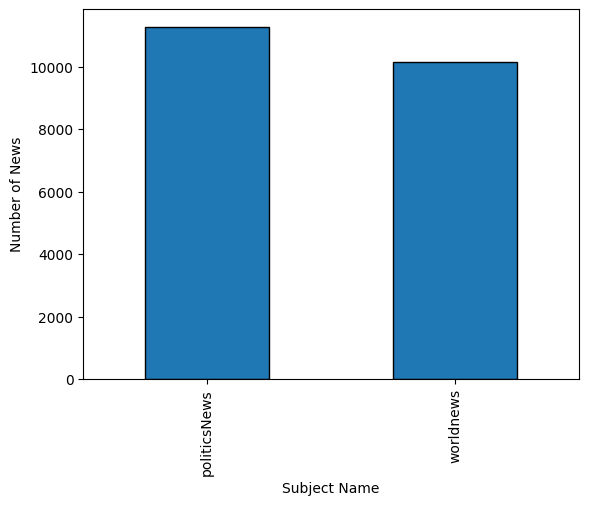

In [ ]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (df['subject'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

**Q5.** Create a pie chart to find the pecentage of news on differenet subject.

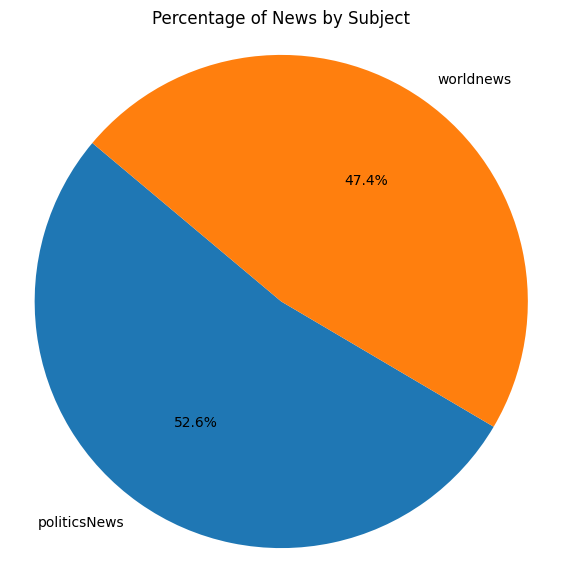

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/Fake.csv")  #fake news file path
df = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/True.csv")  #true news file path

# Count the number of news items per subject
subject_counts = df['subject'].value_counts()

# Create a pie chart
plt.figure(figsize=(7,7))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of News by Subject")
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

**Text Processing**

In [ ]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'\S+https://|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [ ]:
# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)

In [ ]:
# apply wordopt method to the whole dataset and view the text content of a random data point
df1['text']=df1['text'].apply(wordopt)
df1['text'][100]

'washington reuters democratic senator elizabeth warren is taking aim at budget chief mick mulvaney s plan to fill the ranks of the u s consumer financial watchdog with political allies according to letters seen by reuters the latest salvo in a broader battle over who should run the bureau president donald trump last month appointed mulvaney as acting director of the consumer financial protection bureau cfpb though the decision is being legally challenged by the agency s deputy director leandra english who says she is the rightful interim head mulvaney told reporters earlier this month he planned to bring in several political appointees to help overhaul the agency but warren warned in a pair of letters sent monday to mulvaney and the office of personnel management opm which oversees federal hiring that doing so was inappropriate and potentially illegal the cfpb is meant to be an independent agency staffed primarily by non political employees hiring political appointees could violate ci

# **Building Model**

In [ ]:
# Separate independent and target columns from the dataset and stored them in x & y variables
import pandas as pd

# Load dataset
fake_news_data = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/Fake.csv")  #fake news file path
true_news_data = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/True.csv")  #true news file path

# Add 'class' column to the individual dataframes before concatenation
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

# merged true and fake news datasets
merged_data = [fake_news_data, true_news_data]
df = pd.concat(merged_data, axis=0)

# Drop unnecessary columns for classification purpose, keeping 'class'
df1 = df.drop(['title', 'subject', 'date'], axis=1)

# Separate independent (feature) and target columns
x = df1['text']   # Feature column containing news text
y = df1['class']  # Target column containing labels (e.g., FAKE/REAL)

# View first few values to confirm
print("Sample X values:\n", x.head())
print("\nSample Y values:\n", y.head())

Sample X values:
 0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
2    On Friday, it was revealed that former Milwauk...
3    On Christmas day, Donald Trump announced that ...
4    Pope Francis used his annual Christmas Day mes...
Name: text, dtype: object

Sample Y values:
 0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64


**Q6.** Split the dataset into training and testing sets with 25% test size and store them in x_train, x_test, y_train, and y_test.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate independent and target columns
x = df1['text']
y = df1['class']

# Split into training and testing sets (25% test size)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

# Check the size of splits
print("Training set size:", x_train.shape[0])
print("Testing set size:", x_test.shape[0])

Training set size: 33673
Testing set size: 11225


## **Word Embedding ( Word2Vec )**

In [ ]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [ ]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [ ]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])

##**Logistic Regression**

In [ ]:
# Trains a Logistic Regression model using vector formed trained data ->
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
# detect the class(fake or true) on test data and evaluates its accuracy on test set
y_pred = logistic_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",logistic_model.score(xv_test,y_test))

Prediction on test data:  [1 0 1 ... 1 0 1]
Accuracy Score on Test Data:  0.9449443207126949


####**Accuracy Checking**

In [ ]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9449443207126949
Precision: 0.9504373177842566
Recall: 0.9439618463634816
F1 score: 0.9471885147837976


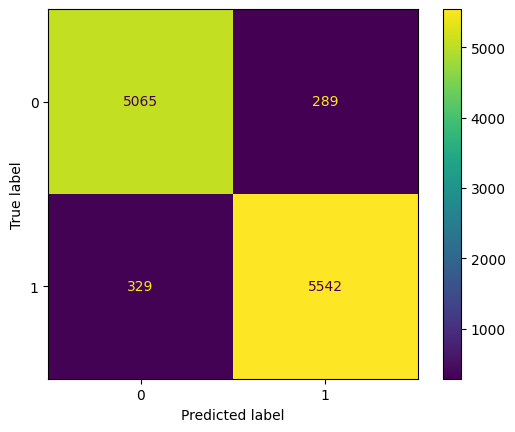

In [ ]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

##**Random Forest Classifier**

####**Model Building and Prediction**

**Q7.** Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.

In [ ]:
# Importing Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Your Dataset
fake_news_data = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/Fake.csv")  #fake news file path
true_news_data = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/True.csv")  #true news file path

# Add 'class' column to the individual dataframes before concatenation
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

# Concatenate the dataframes
df = pd.concat([fake_news_data, true_news_data], axis=0)


# Separate Independent and Target Columns
X = df['text']         # Text data column
y = df['class']        # Target column (0 = fake, 1 = real for example)

# Convert Text into Numerical Features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

# Split into Training & Testing Sets (25% test size)
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.25, random_state=42
)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # let trees grow fully
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Predict on Test Data
y_pred = rf_clf.predict(X_test)

# Evaluate the Model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.996347438752784

📊 Confusion Matrix:
 [[5311   19]
 [  22 5873]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5330
           1       1.00      1.00      1.00      5895

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



####**Accuracy Checking**

**Q8.** Find the accuracy, precison, recall, F1 Score of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.

✅ Model Performance Metrics:
Accuracy : 0.9963
Precision: 0.9963
Recall   : 0.9963
F1 Score : 0.9963


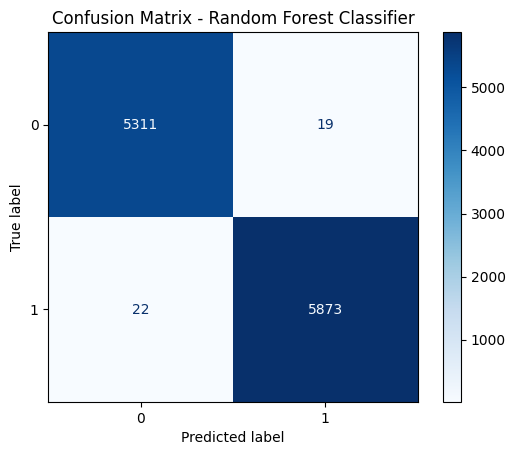

In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load Your Dataset
fake_news_data = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/Fake.csv")  #fake news file path
true_news_data = pd.read_csv("/content/drive/My Drive/IDEAS-TIH/Internship_2025/True.csv")  #true news file path

# Add 'class' column to the individual dataframes before concatenation
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

# Concatenate the dataframes
df = pd.concat([fake_news_data, true_news_data], axis=0)

# Separate Independent and Target Columns
X = df['text']         # Text data column
y = df['class']        # Target column (0 = fake, 1 = real for example)

# Convert Text into Numerical Features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vectorized = vectorizer.fit_transform(X)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # use 'binary' if binary classification
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display Results
print(f"✅ Model Performance Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

#**Save the Model using pickle**

In [ ]:
# save the logistic regression model as pickle file
import pickle
filename1 = '/content/drive/My Drive/IDEAS-TIH/Internship_2025/word2vec_logistic_model.pickle'
pickle.dump(logistic_model, open(filename1, 'wb')) #word2vec model

In [ ]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.5089532293986637


**Q9.** Save the trained Random Forest Model as pickle/svg file in your desired repository for further use.

✅ Random Forest model saved at: saved_models/random_forest_model.pkl


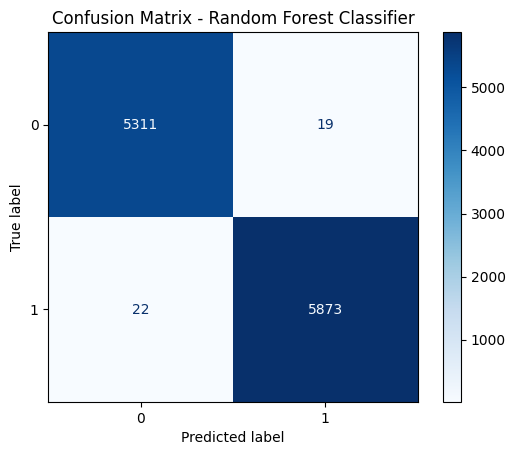

✅ Confusion matrix visualization saved as: saved_models/confusion_matrix.svg


In [ ]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# ---- SAVE TRAINED RANDOM FOREST MODEL AS PICKLE ----
model_filename = "saved_models/random_forest_model.pkl"  # you can set your own folder path
import os
os.makedirs("saved_models", exist_ok=True)  # create folder if it does not exist

with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"✅ Random Forest model saved at: {model_filename}")

# ---- SAVE CONFUSION MATRIX AS SVG ----
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Random Forest Classifier")
plt.savefig("saved_models/confusion_matrix.svg", format='svg')
plt.show()

print("✅ Confusion matrix visualization saved as: saved_models/confusion_matrix.svg")

**Q10.** Load that saved model in another Notebook use it on other dataset for fake news detection.

In [ ]:
import pickle

# Load the saved Random Forest model
with open("saved_models/random_forest_model.pkl", 'rb') as file:
    loaded_model = pickle.load(file)

print("✅ Random Forest model loaded successfully!")

✅ Random Forest model loaded successfully!


**Q11(Optional).**


1.  Try to enhance the model's accuracy by using adaboost or any other boosting methods.
2.  Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.






Accuracy: 0.9944
Precision: 0.9944
Recall: 0.9944
F1 Score: 0.9944


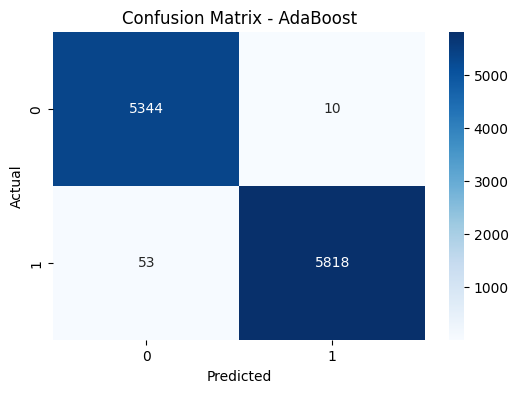

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
import re

# read the csv file using pandas dataframe
fake_news_data = pd.read_csv('/content/drive/My Drive/IDEAS-TIH/Internship_2025/Fake.csv')
true_news_data = pd.read_csv('/content/drive/My Drive/IDEAS-TIH/Internship_2025/True.csv')

fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'\S+https://|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)
df1['text']=df1['text'].apply(wordopt)


# Separate independent and target columns
x = df1['text']
y = df1['class']

# Split into training and testing sets (25% test size)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)


# Initialize AdaBoost with Decision Tree as base learner
from sklearn.tree import DecisionTreeClassifier

# Convert Text into Numerical Features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Vectorize the training and testing data
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)


adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

# Train the model
adaboost.fit(x_train_tfidf, y_train)

# Predict
y_pred = adaboost.predict(x_test_tfidf)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()